# Final Project: Developing an Adaptive Damage System to Increase Game Difficulty

## Overview
The goal of the project is to dynamically increase a video games difficulty based on player input. The project adapts an enemy AI system to allow enemies to evolve resistances based on frequency of player attack types.

## Launching the Game
To play the game either compile the game code yourself if you have SDL2 libraries, or run on Windows.
In Windows, access the "play" folder and use the application on Windows (make sure to leave the application in the folder with the dll files).

## Controls
 - WASD to move around the map
 - Mouse to aim the player in the direction of the enemy
 - Space bar to shoot projectiles
 - TAB key to change damage type
 - ESCAPE key to pause/leave

## Note from David
I wanted to apologize for the quality of the project. I know it's not my usual standard and I will take accountability for that. I've had about 20 minutes a day to my name, and I would like to share what has been keeping me busy in the past little while.

I received a job offer in the middle of April, and was requested to start work as soon as possible. Because of finances, and my entirely asynchronous class schedule, I decided to move off campus early. I moved into my brother's apartment in Chicago on Easter Sunday (April 20th). I then started work that Monday (the 21st) and have been working full-time since. In the meantime, I've moved into a two-bedroom apartment with my brother, and have been keeping up with my other classwork (Sleep has been optional some nights). All that to say, I wanted to thank you for all that you have done for me in these past 4 years. I've genuinely enjoyed all of your classes, and I can confidently say that you taught me more than many of the other professors in the CompSci department. I also wanted to thank you for being a reference on my applications, my employer thinks it's really cool.

## Task Definition

### Goal
The goal is to design an AI system that allows enemies to develop resistances to the player's most common attacks on the prior levels of a system.

### Input
 - Player attack history and type
 - The current level number

### Output
 - Spawn enemies with around 90% of them being resistant to the most frequently used attack.

### Motivation
The reason behind this project is based on many arcade style games having a "spam" style of play, where the user doesn't need to switch up their strategy in order to succeed. The core concept being demoed in this project is meant to demonstrate just one aspect of what would be a larger evolving system including environmental changes, as well as counter-attacks.

### Evaluation Metrics
 - Adaptation Accuracy: How well the enemy adapts to resistances.
 - Gameplay Challenge (Subjective): How much the game gets harder as time goes on.
 - Attack Variety: Are players forced to diversify tactics to respond enemy (is punishment enough?)

## Approach

### Baselines
1. **Random Resistance**: Enemies sometimes choose random attack types and hope that it is right.
2. **Majority Damage Resistance**: Enemies resist the most commonly used attack-type.

### Advanced Method (Mixed Approach)
 - 87.5% chance: Enemies are resisting the most common type
 - 12.5% chance: Enemies are randomly choosing their resistance

### Oracle (Perfect Adaptation)
 - Enemy will always use the attack with the most use at all times.

### Tradeoffs
|  Method  |       Pros       |        Cons        |
|----------|------------------|--------------------|
|  Random  |   Unpredictable  |   No adaptation    |
| Majority |  Counters input  |    Predictable     |
|   Mixed  | Balanced variety | Toss-Up adaptation |
|  Oracle  |  Hardest to beat | Frustrating to use |

I chose the Mixed approach because it balanced out difficulty with the learning predictability.
Mixed also has the advantage of being easily tunable. The adaptation chance is controlled in one variable as the level is finished.

## Data and Experiments
ChatGPT generated this tab so I knew how to start developing the program towards the tests. All tests were also generated by AI to make sure I did not mess up the expected outcome. I am using the results of this to determine how I want to code up the final game's AI, so it is a useful tool to know how I should theoretically handle the video game's logic. Tests were modified throughout the process to be more compliant with video game being created.

### Data Generation
- Simulate 100 levels with scripted player behavior (e.g., 80% physical attacks).
- Track:
  - Damage type proportions.
  - Enemy resistances per level.
  - Changes in "player" attack patterns (in adaptive script).

### Experiment 1: Adaptation Accuracy
- Hypothesis: Resistance % for dominant attack types should increase with level.

### Experiment 2: Randomness Effect
- Compare Random, Majority, Mixed approaches on adaptation accuracy.

### Experiment 3: Player Variety Response
- Use adaptive "player" that switches tactics when resistance rises.
- Measure attack diversity index.

### Experiment 4: Difficulty Progression
- Measure time/enemies needed to clear levels with different adaptation strategies.

### Data Visualization
Results will be visualized using:
- Line graphs for resistance trends.
- Heatmaps for attack usage diversity.
- Curves showing difficulty over levels.


## Code for Experiment 1

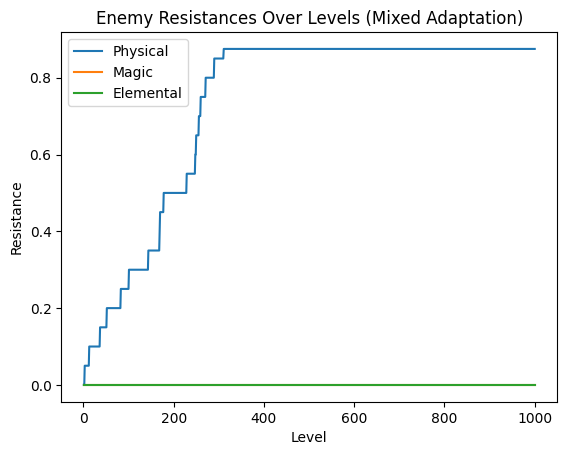

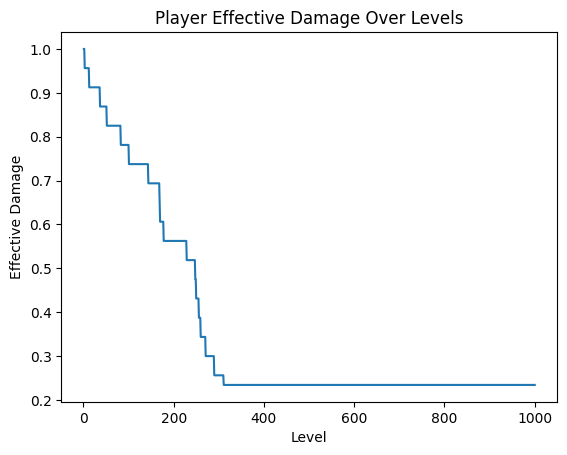

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated player behavior: fixed strategy
player_strategy = {'physical': 0.875, 'magic': 0.0625, 'elemental': 0.0625}

# Simulation parameters
levels = 1000
enemy_resistances = {'physical': 0.0, 'magic': 0.0, 'elemental': 0.0}

# Mixed approach parameters
adapt_chance = 0.05  # 5% chance to adapt to player's attack pattern

# Data storage
resistances_over_time = {'level': [], 'physical': [], 'magic': [], 'elemental': []}
damage_effectiveness = []

# Simulation loop
for level in range(1, levels + 1):
    # Adaptation logic
    if np.random.rand() < adapt_chance:
        # Adapt to most-used attack type
        main_attack = max(player_strategy, key=player_strategy.get)
        enemy_resistances[main_attack] += 0.05  # Increase resistance by 5%
    
    # Cap resistances at 0.875 for realism
    for k in enemy_resistances:
        enemy_resistances[k] = min(enemy_resistances[k], 0.875)

    # Calculate effective damage for this level
    effective_damage = sum([
        player_strategy[k] * (1 - enemy_resistances[k])
        for k in player_strategy
    ])
    
    # Log data
    resistances_over_time['level'].append(level)
    resistances_over_time['physical'].append(enemy_resistances['physical'])
    resistances_over_time['magic'].append(enemy_resistances['magic'])
    resistances_over_time['elemental'].append(enemy_resistances['elemental'])
    damage_effectiveness.append(effective_damage)

# Plot resistances over time
plt.plot(resistances_over_time['level'], resistances_over_time['physical'], label='Physical')
plt.plot(resistances_over_time['level'], resistances_over_time['magic'], label='Magic')
plt.plot(resistances_over_time['level'], resistances_over_time['elemental'], label='Elemental')
plt.title('Enemy Resistances Over Levels (Mixed Adaptation)')
plt.xlabel('Level')
plt.ylabel('Resistance')
plt.legend()
plt.show()

# Plot effective damage over time
plt.plot(resistances_over_time['level'], damage_effectiveness, label='Effective Damage')
plt.title('Player Effective Damage Over Levels')
plt.xlabel('Level')
plt.ylabel('Effective Damage')
plt.show()


## Code for Experiment 2

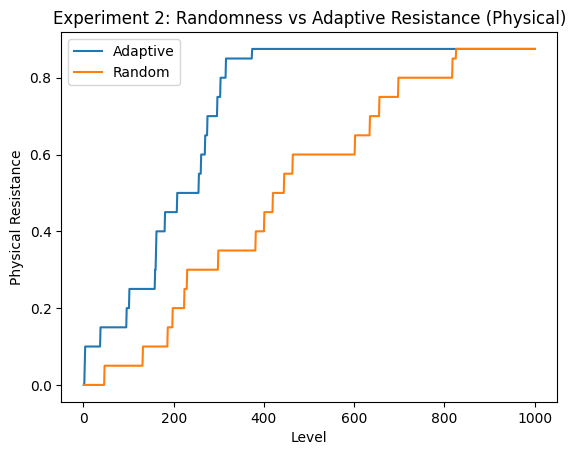

In [ ]:
# Parameters
levels = 1000
runs = 2  # adaptive & random

# Storage
results = {'adaptive': [], 'random': []}

for mode in results.keys():
    enemy_resistances = {'physical': 0.0, 'magic': 0.0, 'elemental': 0.0}
    for level in range(1, levels + 1):
        if mode == 'adaptive' and np.random.rand() < adapt_chance:
            main_attack = max(player_strategy, key=player_strategy.get)
            enemy_resistances[main_attack] += 0.05
        elif mode == 'random' and np.random.rand() < adapt_chance:
            rand_attack = np.random.choice(['physical', 'magic', 'elemental'])
            enemy_resistances[rand_attack] += 0.05

        # Cap resistance
        for k in enemy_resistances:
            enemy_resistances[k] = min(enemy_resistances[k], 0.875)
        
        results[mode].append(enemy_resistances['physical'])

# Plotting
plt.plot(range(1, levels + 1), results['adaptive'], label='Adaptive')
plt.plot(range(1, levels + 1), results['random'], label='Random')
plt.title('Experiment 2: Randomness vs Adaptive Resistance (Physical)')
plt.xlabel('Level')
plt.ylabel('Physical Resistance')
plt.legend()
plt.show()


## Code for Experiment 3

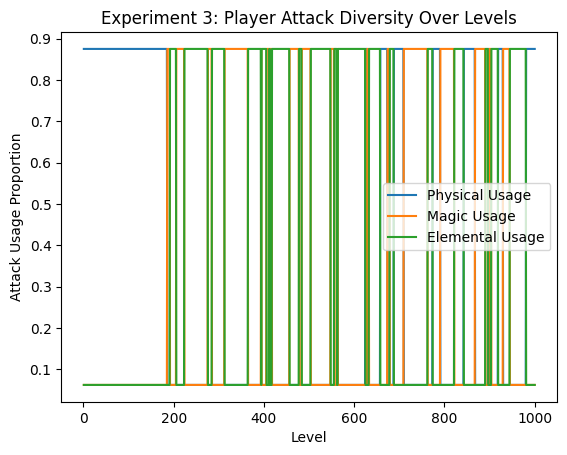

In [5]:
# Adaptive player that switches strategy
enemy_resistances = {'physical': 0.0, 'magic': 0.0, 'elemental': 0.0}
player_strategy = {'physical': 0.875, 'magic': 0.0625, 'elemental': 0.0625}

# Data storage
attack_history = {'physical': [], 'magic': [], 'elemental': []}

for level in range(1, levels + 1):
    # Player adapts if physical resistance is high
    if enemy_resistances['physical'] > 0.5:
        # Switch to magic if magic resistance is lower
        next_attack = min(enemy_resistances, key=enemy_resistances.get)
        player_strategy = {k: 0.875 if k == next_attack else 0.0625 for k in player_strategy}

    # Enemy adapts as usual
    if np.random.rand() < adapt_chance:
        main_attack = max(player_strategy, key=player_strategy.get)
        enemy_resistances[main_attack] += 0.05

    # Cap resistances
    for k in enemy_resistances:
        enemy_resistances[k] = min(enemy_resistances[k], 0.875)

    # Track player's attack usage
    for k in player_strategy:
        attack_history[k].append(player_strategy[k])

# Plotting attack usage over time
plt.plot(range(1, levels + 1), attack_history['physical'], label='Physical Usage')
plt.plot(range(1, levels + 1), attack_history['magic'], label='Magic Usage')
plt.plot(range(1, levels + 1), attack_history['elemental'], label='Elemental Usage')
plt.title('Experiment 3: Player Attack Diversity Over Levels')
plt.xlabel('Level')
plt.ylabel('Attack Usage Proportion')
plt.legend()
plt.show()


## Code for Experiment 4

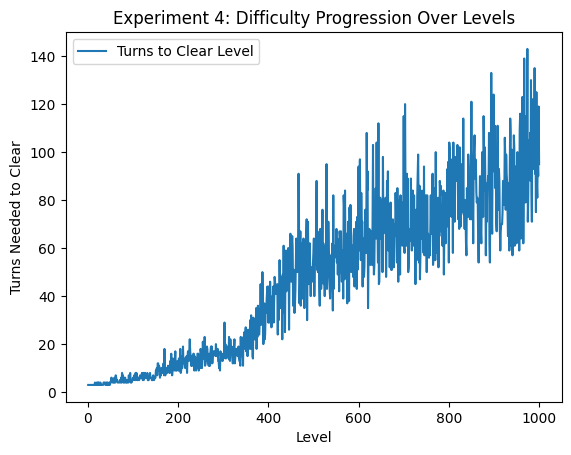

In [8]:
# Simulate clearing enemies as resistances rise
enemy_base_count = 3
difficulty = []

enemy_resistances = {'physical': 0.0, 'magic': 0.0, 'elemental': 0.0}
player_strategy = {'physical': 0.875, 'magic': 0.0625, 'elemental': 0.0625}

for level in range(1, levels + 1):
    enemies_remaining = enemy_base_count + level // 50  # Increase enemies over time
    turns = 0

    # Adapt resistances
    if np.random.rand() < adapt_chance:
        main_attack = max(player_strategy, key=player_strategy.get)
        enemy_resistances[main_attack] += 0.05

    # Cap resistances
    for k in enemy_resistances:
        enemy_resistances[k] = min(enemy_resistances[k], 0.875)

    # Simulate battle
    while enemies_remaining > 0:
        # Effective damage is lowered by resistance
        effective_damage = sum([
            player_strategy[k] * (1 - enemy_resistances[k])
            for k in player_strategy
        ])

        if np.random.rand() < effective_damage:
            enemies_remaining -= 1

        turns += 1

    difficulty.append(turns)

# Plotting difficulty curve
plt.plot(range(1, levels + 1), difficulty, label='Turns to Clear Level')
plt.title('Experiment 4: Difficulty Progression Over Levels')
plt.xlabel('Level')
plt.ylabel('Turns Needed to Clear')
plt.legend()
plt.show()


## Analysis

### Experiment 1
 - Easiest for the game to adapt to, as well as being the easiest to predict
 - If the player was less rigid, the character would easily be able to counter
 - Correctly supports the theory that the enemy can, and will, learn as the levels pass

### Experiment 2
 - Does not counter the player using "spam" attack moves like the first experiment does
 - The randomness does not **necessarily** grow with a pattern, but starts to converge on perfect defense due to the sheer amount of enemies being spawned.
 - Highlights exactly why having some targetted adapatations to the AI is beneficial to the playability of the game.

### Experiment 3
 - Modulating the players actions whenever the enemy adapts promotes attack diversity and demonstrates the advantage of not brute-forcing the damage on enemies.
 - Demonstrates realistic gameplay, since most people would aim to make their odds of survival higher by using a variety of attacks.

### Experiment 4
 - Shows how quickly the difficulty of the game increases when adaptations are left unchecked.
 - Enemy AI is able to perfectly counter the user's inputs on most occasions
 - Test needed to be expanded to more attempts across all tests in order to allow the user to beat the AI often enough in this experiment to see significant results.

## Conclusion

Implementing a system that bases game difficulty on player interaction, as well as allowing a little it of randomness into the algorithm allows for the game to scale in difficulty not only with enemy count, but also with enemy adaptation. The algorithm also excels in preventing the user from sitting in a corner and holding the space bar, which was the intended goal of the project.

Overall, the most meaningful improvement was noticed when I scaled back the adaptation of the enemy. It seems to be a very easy game in the early game stages since the user is only fighting against a dozen enemies, but as the levels progress, having the aggression of the AI be tuned back helped to make the game more playable and less reliant on running around in circles for several minutes.

If I went back and redesigned this AI in the gamefiles, I would make a "tapered" system that slowly works the aggression of the AI down as the amount of enemies increases. I would also work out a wiser spawn function, since linearly increasing the enemy count can quickly cause the user to be trapped in a corner by AI that are resistant to the user's attacks.

Features for the Future:
 - Allowing adaptations to be on the individual scale, meaning some enemies can choose to favor other damage types based on their own preferred algorithm (not just majority).
 - Incorporating more adaptive behaviors into the game, not just the player's damage type.